# <center>Recommendation System for Streaming Platforms</center>
<p><img style="max-width:350px" src="https://uctangerine.com/wp-content/uploads/2020/09/streaming.png"></p>
<p style="font-size:17px">We will explore movie data of popular streaming platforms and build a recommendation system.</p>

# __Importing libraries__

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# __Understanding the Dataset__

In [2]:
# Load dataset
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")
df = df.iloc[:,1:] # removing the unnamed index column

In [3]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
# Show initial information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [5]:
# Exploring the unique values in the 'Type' column
df.Type.unique()

array([0], dtype=int64)

# __Working with Missing Values__

In [6]:
# Finding missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,9390,56.079790
IMDb,571,3.410177
Rotten Tomatoes,11586,69.194935
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [7]:
# Dropping values with missing % more than 50%
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)

# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'], inplace=True)
df.reset_index(inplace=True, drop=True)

# Converting into object type
df.Year = df.Year.astype("object")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15233 entries, 0 to 15232
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  int64  
 1   Title        15233 non-null  object 
 2   Year         15233 non-null  object 
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Type         15233 non-null  int64  
 9   Directors    15233 non-null  object 
 10  Genres       15233 non-null  object 
 11  Country      15233 non-null  object 
 12  Language     15233 non-null  object 
 13  Runtime      15233 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


# __Distribution Plots__

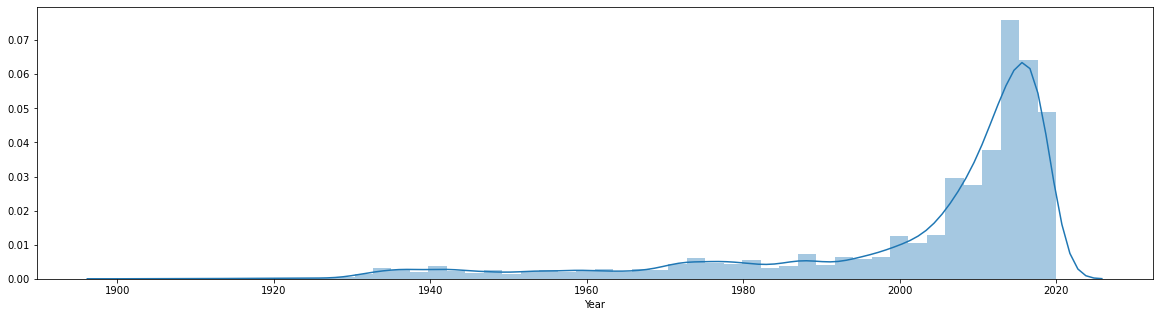

In [9]:
# checking Distribution of years
plt.figure(figsize=(20,5))
sns.distplot(df['Year'])
plt.show()

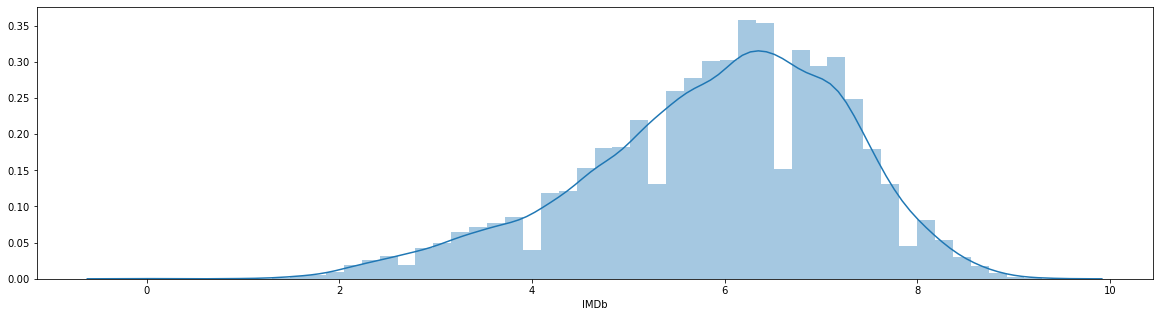

In [10]:
# Distribution of IMDb Rating
plt.figure(figsize=(20,5))
sns.distplot(df['IMDb'])
plt.show()

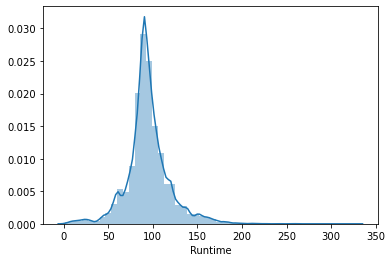

In [11]:
# Distribution of runtime
sns.distplot(df['Runtime'])
plt.show()

# __Distribution of Movies on Each Streaming Platform__

In [12]:
# A function to calculate the movies in different Streaming platforms
def m_cnt(plat, count=False):
    if count == False:
        print('Platform {} Count: {}'. format(plat, df[plat].sum()))
    else:
        return df[plat].sum()

In [13]:
# Let's see the count of movies for each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Platform Netflix Count: 3152
Platform Hulu Count: 848
Platform Prime Video Count: 11289
Platform Disney+ Count: 542


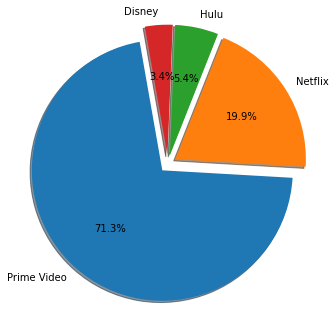

In [14]:
# Movies on each platform
lab = 'Prime Video','Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count=True),
     m_cnt('Netflix', count=True),
     m_cnt('Hulu', count=True),
     m_cnt('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()
# plt.figure(figsize=(20,5))
ax1.pie(s,
       labels = lab,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100,
       radius=1.5)

ax1.axis = ('equal')
plt.show()

# __Movie Distribution According To Genre__

In [15]:
# Split the genres by ',' & then stack it one after the other for easy analysis.
g = df['Genres'].str.split(',').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)

# Assign name to column
g.name = 'Genres'

# delete column
del df['Genres']

# join new column with the existing dataframe
df_genres = df.join(g)

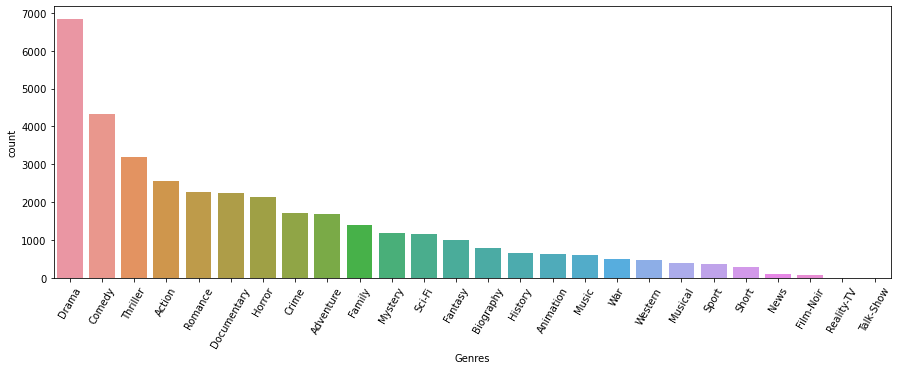

In [16]:
# Count of movies according to genre
plt.figure(figsize=(15,5))
sns.countplot(x='Genres', data=df_genres, order=df_genres['Genres'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

# __Movie Distribution According To Country__

In [17]:
# Split the Country by ',' & then stack it one after the other for easy analysis.
c = df['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)

# Assign name to column
c.name = 'Country'

# delete column
del df['Country']

# join new column with the existing dataframe
df_country = df.join(c)

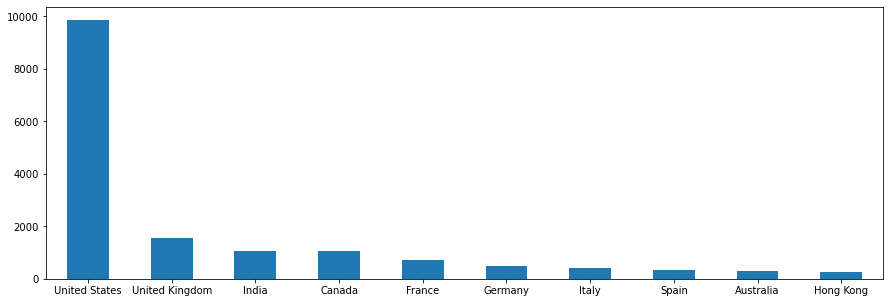

In [18]:
# plotting top 10 country and movie count
df_country['Country'].value_counts()[:10].plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=0)
plt.show()

# __Movie Distribution According To language__

In [19]:
# perform stacking operation on language column
l = df['Language'].str.split(',').apply(pd.Series,1).stack()
l.index = l.index.droplevel(-1)

# Assign name to column
l.name = 'Language'

# delete column
del df['Language']

# join new column with the existing dataframe
df_language = df.join(l)

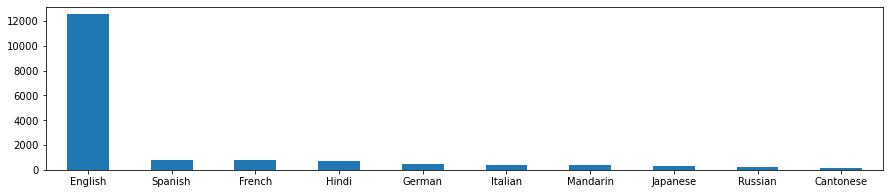

In [20]:
# plotting top 10 Language and movie count
df_language['Language'].value_counts()[:10].plot(kind='bar',figsize=(15,3))
plt.xticks(rotation=0)
plt.show()

# __IMDB rating Distribution According On Each Platform__

In [21]:
# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","IMDb","Type","Runtime"], var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)

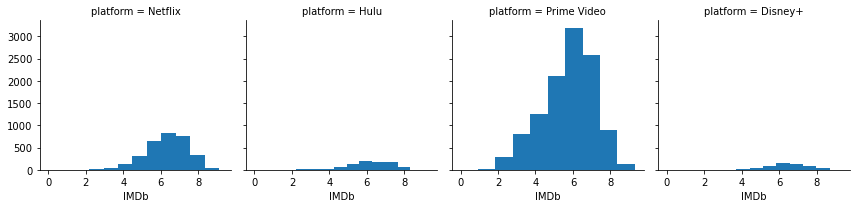

In [22]:
# Distribution of IMDB rating in different platform
g = sns.FacetGrid(df2, col = "platform")
g.map(plt.hist, "IMDb")
plt.show()

# __Runtime Per Platform Along with Age Group__

In [23]:
# Load dataset to restore the 'Age' column
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")
df = df.iloc[:,1:]
df.ID = df.ID.astype("object")

# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb","Rotten Tomatoes","Type","Runtime"],
              var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)

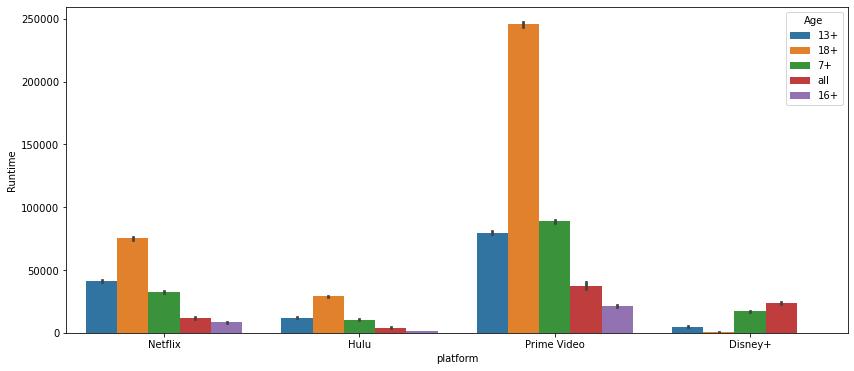

In [24]:
# Total of runtime in different platform
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(x="platform", y="Runtime", data=df2, hue="Age", estimator=sum)